## MACHINE LEARNING 7, 8, 9, 10 & 11

### Problem Statement: Machine Learning 7 

In [18]:
import pandas 
 
with open("nba_2013.csv", 'r') as csvfile:
    nba_raw = pandas.read_csv(csvfile) 

In [19]:
nba = nba_raw.fillna(0)

In [20]:
nba=nba.convert_objects(convert_numeric=True).dropna()

C:\Users\RK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [21]:
print("nba.columns.values:",nba.columns.values)
nba.head(5)

nba.columns.values: ['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [22]:
#The k-nearest neighbors is based around the simple idea of predicting unknown values by matching them with the most similar known values.
#
#Let's say that we have 3 different types of cars:
#
# car,horsepower,racing_stripes,is_fast
# HondaAccord,180,False,False
# Yugo,500,True,True
# Delorean DMC-12,200,True,True
#
#Let's say that we now have another car:
#
# Chevrolet Camaro,400,True,Unknown
#
#We don't know whether or not this car is fast. In order to predict if it is,we find the most similar known car.In this case,we would compare the horsepower and racing_stripes values to find the most similar car,which is the Yugo.Since the Yugo is fast,we would predict that the Camaro is also fast. This is an example of 1-nearest neighbors--we only looked at the most similar car.
#
#If we performed a 2-nearest neighbors,we would end up with 2 True values(for the Delorean and the Yugo),which would average out to True.
#
#If we did 3-nearest neighbors,we would end up with 2 True values and a False value ,which would average out to True.
####3:Euclide and istance
#Before we can predict using KNN,we need to find some way to figure out which data rows are "closest" to the row we're trying to predicton.
#
#A simple way to do this is to use Euclide and istance.The formula is
#$\sqrt{(q_1-p_1)^2+(q_2-p_2)^2+\cdots+(q_n-p_n)^2}$
#
#Let's say we have the set wo rows(True/False has been converted to 1/0),and we want to find the distance between them:
#
# Honda Accord,180,0
# Chevrolet Camaro,400,1
#
#We would first only select the numeric columns.Then the distance becomes
#$\sqrt{(180-400)^2+(0-1)^2}$,whichisaboutequalto220.
#####Instructions
#Make a function for calculating the euclide and istance between two pandas series.Use the function to find the euclide and istance between selected_player and each row in nba. Use the .apply(func,axis=1)method on dataframes to apply function func to each row.The function should take row as its first argument.Only use the columns in distance_columns to compute the distance.<ahref="http://pandas.pydata.org/pandasdocs/dev/generated/pandas.DataFrame.apply.html">Here's</a>moreonthemethod.
#
#Assign the resulting pandas series to lebron_distance.


In [24]:
import math
selected_player = nba[nba["player"]== "LeBron James"].iloc[0]
distance_columns=['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast',
'stl','blk','tov','pf','pts']

def euclidean_distance(row):
    inner_value=0
    for k in distance_columns:
        inner_value+=(row[k]-selected_player[k])**2
    return math.sqrt(inner_value)

lebron_distance=nba.apply(euclidean_distance,axis=1)
print("lebron_distance[:5]:\n",lebron_distance[:5])


lebron_distance[:5]:
 0    3475.792868
1    3148.395020
2    3161.567361
3    1189.554979
4    3216.773098
dtype: float64


In [103]:
####4:Normalizing columns

#Variables which are much larger in absolute terms have the potential to have a larger impact on distance.This can be bad,because a variable having larger values doesn't necessarily make it better at predicting what rows are similar.
#
#A simple way to deal with this is to normalize all the columns to have a mean of 0,and a standard deviation of 1.This will ensure that no single column has a dominant impact on the euclide and istance calculations.
#
#To set the mean to 0,we have to find them e an of a column,then subtract them e an from every value in the column.To set the standard deviation to 1,we divide every value in the column by the standard deviation.The formula is $x=\frac{x-\mu}{\sigma}$.
#####Instructions
#Normalize the columns in nba_numeric. Using.mean()on a dataframe will return the mean of each column.Using.std()will return the standard deviation of each column

In [25]:
nba_numeric = nba[distance_columns]

nba_numeric.head(5)

nba_normalized=(nba_numeric-nba_numeric.mean())/nba_numeric.std()

nba_normalized.head(5)


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,-0.835906,0.384886,-0.862207,-0.435088,-0.738401,-0.768505,0.325957,-0.700282,-0.716608,0.120520,...,-0.151926,0.260690,-0.129462,-0.013116,-0.645220,-0.468056,0.061410,-0.667650,0.226515,-0.734621
1,-1.550487,1.095711,-0.187863,-0.045011,-0.581271,-0.649215,0.667749,-0.778936,-0.829601,-1.390497,...,-0.522588,1.387883,0.187020,0.565852,-0.530733,0.020680,1.065446,-0.013760,1.363938,-0.534801
2,0.116868,-0.010016,-0.457600,-0.308035,-0.290291,-0.405214,0.833763,-0.778936,-0.829601,-1.390497,...,-0.250457,0.743773,0.283340,0.436083,-0.568895,-0.439307,0.385292,-0.524113,0.029924,-0.328603
3,0.355062,0.779789,1.599148,1.465144,1.577804,1.590172,0.238067,1.737992,1.430256,1.027130,...,0.575320,-0.383420,0.462221,0.216475,1.033919,-0.123066,-0.683520,1.182380,0.423107,1.729123
4,-0.359519,0.108454,0.149309,-0.319180,-0.331028,-0.475703,1.087666,-0.778936,-0.822068,-1.390497,...,0.673851,0.614951,0.138859,0.291341,-0.553630,-0.468056,0.709175,-0.141348,1.139262,-0.400878


In [105]:
####5:Finding the nearest neighbor

#We now know enough to find the nearest neighbor of a given row.We can use the distance.euclidean function from scipy.spatial,a much faster way to calculate euclidean distance.
#####Instructions
#Find the player most similar to LeBronJames by our distance metric.You can do this by finding the second lowest value in the euclidean_distances series(the lowest value will correspond to lebron,as he is most similar to himself),and then cross-referencing then ba dataframe with the same index.
#
#Assign the name of the player to most_similar_to_lebron.

In [26]:
from scipy.spatial import distance

In [27]:
nba_normalized.fillna(0,inplace=True)

In [28]:
lebron_normalized=nba_normalized[nba["player"]=="LeBron James"]

In [31]:
euclidean_distances=nba_normalized.apply(lambda row:distance.euclidean(row, lebron_normalized),axis=1)

distance_frame= pandas.DataFrame(data={"dist":euclidean_distances,"idx": euclidean_distances.index})

second_smallest=distance_frame.iloc[1]["idx"]

most_similar_to_lebron=nba.loc[int(second_smallest)]["player"]

print("most_similar_to_lebron:",most_similar_to_lebron)

most_similar_to_lebron: Steven Adams


In [36]:
import random
from numpy.random import permutation
#Randomlyshuffletheindexofnba.
random_indices=permutation(nba.index)
#Set a cutoff for how many items we want in the test set(in this case 1/3 of the items).
test_cutoff=math.floor(len(nba)/3)
#Generate the test set by taking the first 1/3 of the randomly shuffled indices.

test=nba.loc[random_indices[1:test_cutoff]]

#Generate the trainset with the rest of the data.
train=nba.loc[random_indices[test_cutoff:]]

In [37]:
from sklearn.neighbors import KNeighborsRegressor

#The columns that we will be making prediction swith.

x_columns=['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast',
'stl','blk','tov','pf','pts']

#The column that we want to predict.
y_column=['pts']


In [38]:
#Create the knn model.

knn=KNeighborsRegressor(n_neighbors=5)


In [39]:
#Fit the model on the training data.

knn.fit(train[x_columns],train[y_column])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [40]:
#Make predictions on the test set using the fit model.
predictions=knn.predict(test[x_columns])
print("predictions[:5]:\n",predictions[:5])

predictions[:5]:
 [[3.2080e+02]
 [1.4140e+02]
 [5.7880e+02]
 [6.0000e-01]
 [1.2696e+03]]


In [41]:
####8:Computing error
#Now that we know our predictions,we can compute the error involved. We can compute <a href="http://en.wikipedia.org/wiki/Mean_squared_error">meansquarederror</a>.The formula is $\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})^{2}$.
#####Instructions
#Compute the meansquared error between actual and predictions.Assign the result to mse.

In [42]:
actual=test[y_column]
mse=(((predictions-actual)**2).sum())/len(predictions)
print("actual[:20]:\n",actual[:20])
print("mse:",mse)

actual[:20]:
       pts
368   306
319   143
216   588
397     0
197  1248
307  1328
376   879
432   393
333    44
137     6
6    1603
340    65
244   921
85   1167
77    225
47     72
373   339
263    19
412  1012
18     28
mse: pts    3721.79522
dtype: float64


## Problem Statement: Machine Learning 8 

In [138]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [139]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
response=urllib.request.urlopen('http://php.net/')
html=response.read()
soup=BeautifulSoup(html,"html5lib")
text=soup.get_text(strip=True)
tokens=[t for t in text.split()]
clean_tokens=tokens[:]
sr=stopwords.words('english')
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq=nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key)+':'+str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

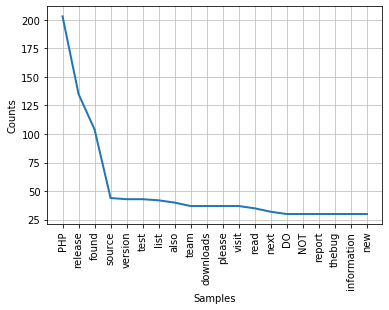

In [141]:
freq.plot(20,cumulative=False)
%matplotlib inline

### Problem Statement: Machine Learning 9

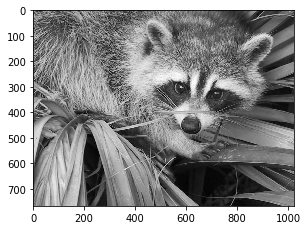

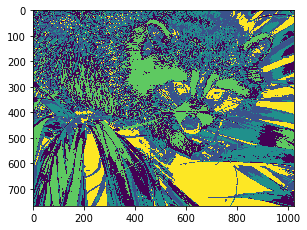

In [142]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

#Visualize the gray scale image
f=scipy.misc.face(gray=True)
plt.figure(figsize=(10,3.6))
plt.imshow(f,cmap=plt.cm.gray)
plt.show()

#Compressing the grayscale image into 5 clusters
rows=f.shape[0]
cols=f.shape[1]

#print(rows,cols)

image=f.reshape(rows*cols,1)
kmeans=KMeans(n_clusters=5)
kmeans.fit(image)
clusters=np.asarray(kmeans.cluster_centers_)
labels=np.asarray(kmeans.labels_)
labels=labels.reshape(rows,cols);

#np.save('codebook_racoon.npy',clusters)

plt.imsave('compressed_racoon.png',labels);
#Visualize the compressed image
image=plt.imread('compressed_racoon.png')
plt.figure(figsize=(10,3.6))
plt.imshow(image)
plt.show()

### Problem Statement: Machine Learning 10 

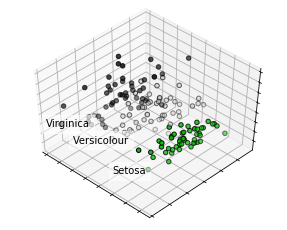

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
np.random.seed(5)
centers=[[1,1],[-1,-1],[1,-1]]
iris=datasets.load_iris()
X=iris.data
y=iris.target

fig=plt.figure(1,figsize=(4,3))
plt.clf()
ax=Axes3D(fig,rect=[0,0,.95,1],elev=48,azim=134)

plt.cla()
pca=decomposition.PCA(n_components=3)
pca.fit(X)
X=pca.transform(X)
for name,label in[('Setosa',0),('Versicolour',1),('Virginica',2)]:
    ax.text3D(X[y==label,0].mean(),X[y==label,1].mean()+1.5,X[y==label,2].mean(),name,horizontalalignment='center',bbox=dict(alpha=.5,edgecolor='w',facecolor='w'))
#Reorderthelabelstohavecolorsmatchingtheclusterresults
y=np.choose(y,[1,2,0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,2],c=y,cmap=plt.cm.nipy_spectral,
edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

### Problem Statement: Machine Learning 11 

In [4]:
import os
os.chdir('Downloads')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


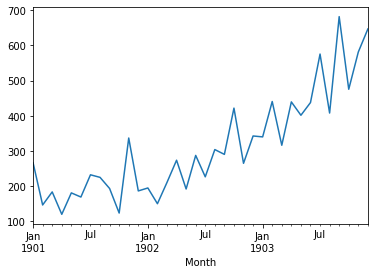

In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')
series=read_csv('shampoo.txt',header=0,parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [8]:
#fit model

model=ARIMA(series,order=(5,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary())

C:\Users\RK\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\RK\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 27 Jan 2020   AIC                            406.340
Time:                        20:10:27   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

In [9]:
X=series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [10]:
size=int(len(X)*0.66)

In [11]:
train,test=X[0:size],X[size:len(X)]

In [13]:
history=[x for x in train]

In [14]:
predictions=list()
for t in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f,expected=%f'%(yhat,obs))
error=mean_squared_error(test,predictions)
print('TestMSE:%.3f'%error)


predicted=349.117798,expected=342.300000
predicted=306.513020,expected=339.700000
predicted=387.376364,expected=440.400000
predicted=348.154251,expected=315.900000
predicted=386.308863,expected=439.300000
predicted=356.082058,expected=401.300000
predicted=446.379488,expected=437.400000
predicted=394.737309,expected=575.500000
predicted=434.915521,expected=407.600000
predicted=507.923503,expected=682.000000
predicted=435.482955,expected=475.300000
predicted=652.743771,expected=581.300000
predicted=546.343508,expected=646.900000
TestMSE:6958.322


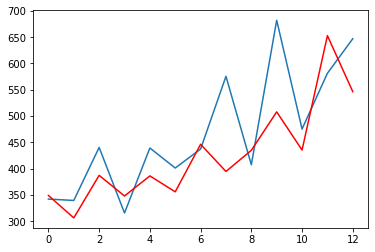

In [15]:
#plot

pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()